___
# Курс Карпова "Введение в Data science и машинное обучение"
___

Разница между Data analyst, Data engeneer, ML engeneer и остальными

Domain - знания в области и общение с заказчиком, Math - математика, Dev - программная часть

![title](Pic_1.png)

1) В решении задач очень важно уметь ПЕРЕФОРМУЛИРОВАТЬ задачу на язык ML;

2) Далее необходимо подготовить данные

3) Применение ML 

4) Валидация. Валидация - проверка того, что можеть может выдавать предсказание выше случайного

Фича - (независимое) свойство объекта для отнесения к одному или другому классу

Целевая переменная (зависимое свойство) - это сам класс

Модель - это такая штука, которая получает информацию об объекте и относит его к тому или иному классу

Линейная регрессия - это подбор коэффициентов прямой, чтобы среднеквадратичная ошибка была минимальная

![title](Pic_2.png)
![title](Pic_3.png)

Обучить модель машинного обучения ЗНАЧИТ на основании конечного набора примеров добиться того, чтобы на других примерах мочь делать правильные предсказания

In [14]:
import pandas as pd
import numpy as np

In [18]:
students_performanse = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [20]:
students_performanse.head() # Вывод первых 5 строчек

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
students_performanse.tail() # Вывод последних 5 строчек

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [22]:
students_performanse.describe() # вывод основных параметров данных

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [23]:
students_performanse.dtypes # вывод типов данных столбцов

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [24]:
students_performanse.shape # вывод размерности DataFrame

(1000, 8)

Методы можно по-хитрому объединять, например, для группировки

In [29]:
students_performanse.groupby('gender').aggregate({'writing score': 'mean'})
# Далее по сути выводится средний балл по каждому полу

,writing score
gender,
female,72.467181
male,63.311203


In [31]:
students_performanse.size # произведение колонок на строки

8000

___
### Основные операции с DataFrame
___

In [32]:
students_performanse.head() # Вывод первых 5 строчек

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Вывод элементов DataFrame по индексам осуществляется через метод .iloc так:

In [41]:
students_performanse.iloc[0:5, 0:3] # Метод iloc (integer location) - типа позиции
# По сути, это обращение к элементам dataframe по индексам

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


In [36]:
students_performanse[0:5, 0:3] # А так не рабоатет

TypeError: '(slice(0, 5, None), slice(0, 3, None))' is an invalid key

In [40]:
students_performanse.iloc[[0, 3, 9, -1], [-1, -2, -3]] # Метод iloc (integer location) - типа позиции

,writing score,reading score,math score
0,74,72,72
3,44,57,47
9,50,60,38
999,86,86,77


Вывод элементов DataFrame по названиям осуществляется через метод .loc так:

(но сначала немного подготовки)

Выделим определенные строки (индексы в смысле DataFrame-ов):

In [74]:
students_performanse_with_names = students_performanse.iloc[[0, 3, 4, 7, 8]] 

In [75]:
students_performanse_with_names.index = ['Cersei', 'Tywin', 'Gregor', 'Joffrey', 'Ilyn Payne']

In [76]:
students_performanse_with_names

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


In [49]:
students_performanse_with_names.loc[['Cersei', 'Joffrey'], ['gender', 'writing score']]

,gender,writing score
Cersei,female,74
Joffrey,male,39


___
Серии (Series) в pandas

Серия - это такой список с именами (labels) элементов
___

In [50]:
students_performanse_with_names.iloc[:, 0]

Cersei        female
Tywin           male
Gregor          male
Joffrey         male
Ilyn Payne      male
Name: gender, dtype: object

In [51]:
type(students_performanse_with_names.iloc[:, 0])

pandas.core.series.Series

In [54]:
pd.Series([1, 2, 3], index=['Cersei', 'Tywin', 'Gregor'])

Cersei    1
Tywin     2
Gregor    3
dtype: int64

In [53]:
type(pd.Series([1,2,3]))

pandas.core.series.Series

___
А DataFrame сам по себе представляет из себя всего лишь Серии (столбцы) с названиями (названия стоблцов)
___

In [56]:
my_series_1 = pd.Series([1, 2, 3], index=['Cersei', 'Tywin', 'Gregor'])
my_series_2 = pd.Series([4, 5, 6], index=['Cersei', 'Tywin', 'Gregor'])

In [57]:
pd.DataFrame({'col_name_1':my_series_1, 'col_name_2':my_series_2})

,col_name_1,col_name_2
Cersei,1,4
Tywin,2,5
Gregor,3,6


Таким образом, можно к датафрейму обращаться по именам серий (и, как ни странно, получать серии):

Причем можно при обращении получить как серию, так и датафрейм из одного столбца:

In [59]:
students_performanse_with_names['gender'] 

Cersei        female
Tywin           male
Gregor          male
Joffrey         male
Ilyn Payne      male
Name: gender, dtype: object

In [60]:
students_performanse_with_names[['gender']]

,gender
Cersei,female
Tywin,male
Gregor,male
Joffrey,male
Ilyn Payne,male


In [61]:
students_performanse.iloc[0:7]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [62]:
students_performanse.iloc[:7]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [63]:
students_performanse.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [65]:
students_performanse.loc[:7]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


In [66]:
students_performanse.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [67]:
students_performanse.shape

(1000, 8)

In [68]:
students_performanse.size

8000

In [72]:
students_performanse.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [73]:
students_performanse.index

RangeIndex(start=0, stop=1000, step=1)

In [75]:
students_performanse.dtypes.value_counts()

object    5
int64     3
dtype: int64

___
Какая-то задача
____

In [76]:
titan_ds = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [77]:
titan_ds.shape

(891, 12)

In [78]:
titan_ds.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [80]:
titan_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


___
# Фильтрация Dataframe-ов
___

In [1]:
import pandas as pd
import numpy as np

In [2]:
students_performanse = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [3]:
students_performanse.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
students_performanse.gender == 'female'

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997     True
998     True
999     True
Name: gender, Length: 1000, dtype: bool

___
Отфильтровать записи (строки) можно следующим образом:

По сути мы просим вывести те записи, для которых значение gender True или False
___

In [8]:
students_performanse.loc[students_performanse.gender == 'female', ['gender', 'writing score']]
# По сути мы просим вывести те строки в которых gender == female и при этом из таких записей
# вывести только столбцы gender и writing score

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
...,...,...
993,female,74
995,female,95
997,female,65
998,female,77


Выведем только те записи, у которых значение "writing score" больше среднего

In [10]:
mean_writing_score = students_performanse['writing score'].mean()

In [11]:
students_performanse.loc[students_performanse['writing score'] > mean_writing_score]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


___
В pandas нельзя использовать and к сериям. Это значит, что если мы хотим сделать совместный фильтр по нескольким условиям, то применять and или or нельзя. Необходимо применять перегруженные операторы & и |. Причем оччень важно понимать, что такие операторы имеют бОльший приоритет, чем другие логические (но не арифметические операции). 

Пример неправильного использования:

In [12]:
students_performanse['writing score'] > mean_writing_score and students_performanse.gender == 'female'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Данная ошибка говорит, что нельзя применять логический оператор and к серии (а сравнение идет именно серий)

Пример правильного использования:

In [15]:
query = (students_performanse['writing score'] > mean_writing_score) & (students_performanse.gender == 'female')

In [16]:
students_performanse.loc[query]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


___
Вопрос: у какой доли студентов в графе lunch указано "free/reduced"?

Решение ниже:

In [17]:
query = (students_performanse.lunch == 'free/reduced')

In [22]:
students_performanse.loc[query].shape[0]/students_performanse.shape[0]

0.355

___
Вопрос: Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?



In [30]:
students_performanse.loc[students_performanse.lunch == 'free/reduced'].mean()

math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

In [31]:
students_performanse.loc[students_performanse.lunch != 'free/reduced'].mean()

math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

In [34]:
students_performanse.loc[students_performanse.lunch == 'free/reduced'].var()

math score       229.824270
reading score    221.871139
writing score    238.202881
dtype: float64

In [35]:
students_performanse.loc[students_performanse.lunch != 'free/reduced'].var()

math score       186.418089
reading score    191.285560
writing score    205.620887
dtype: float64

___
В случае, если столбцы имеют имена с пробелов -- обращаться к ним через точку (как к атрибуту dataframe) нельзя, надо как в примере выше обращаться через []
students_performanse['writing score']. Это, само собой, неудобно, поэтому необходимо переименовать стоблцы так, чтобы их название было одним словом.

Переименование столбцов происходит следующим образом:


In [38]:
students_performanse = students_performanse \
    .rename(columns = 
           {'parental level of education': 'parental_level_of_education',
            'test preparation course': 'test_preparation_course',
            'math score': 'math_score',
            'writing score': 'writing_score',
            'reading score': 'reading_score'})

In [39]:
students_performanse

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [43]:
students_performanse.math_score

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

___
Также есть возможность задавать запросы (query) методом .query:

In [48]:
students_performanse.query('writing_score == 78').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
5,female,group B,associate's degree,standard,none,71,83,78
15,female,group C,some high school,standard,none,69,75,78
144,male,group D,some college,standard,none,88,73,78
156,female,group E,high school,free/reduced,completed,66,74,78
167,female,group B,master's degree,free/reduced,completed,58,76,78


In [49]:
students_performanse.query('writing_score > 78').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80


In [52]:
students_performanse.query("(gender == 'female') & (writing_score > 78)").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88


Если мы хотим обращаться к какой-либо переменной, то надо её экранировать символом @

In [60]:
writing_score_query = 85

In [58]:
students_performanse.query("writing_score > writing_score_query").head() # Неверно

UndefinedVariableError: name 'writing_score_query' is not defined

In [62]:
students_performanse.query("writing_score > @writing_score_query").head() # верно

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
38,female,group D,associate's degree,free/reduced,completed,75,90,88


___
Метод отбора определенных колонок
___

In [63]:
students_performanse[['math_score', 'reading_score']].head()

,math_score,reading_score
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78


___
Можно получить названия всех колонок довольно просто двумя способами:

Первый состоит в работе с датафреймом как с элементом питона

In [65]:
list(students_performanse)

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

Получение всех колонок, у которых в названии есть слово "score" в названии

In [67]:
score_columns = [i for i in list(students_performanse) if 'score' in i]

In [68]:
score_columns

['math_score', 'reading_score', 'writing_score']

In [69]:
students_performanse[score_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


Второй способ состоит в методе .filter:

In [72]:
students_performanse.filter(like='score').head() # like -- содержит значение "score"

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [82]:
students_performanse_with_names.filter(like='co') # выделение всех колонок, у которых есть "со" в названии

,test_preparation_course,math_score,reading_score,writing_score
Cersei,none,72,72,74
Tywin,none,47,57,44
Gregor,none,76,78,75
Joffrey,none,40,43,39
Ilyn Payne,completed,64,64,67


In [85]:
students_performanse_with_names.filter(like='y', axis=0) # выделение всех колонок, у которых есть "со" в названии

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


In [86]:
students_performanse_with_names.filter(like='y', axis=0) # выделение всех колонок, у которых есть "со" в названии

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


___
# Группировка и агрегация
___

In [1]:
import pandas as pd
import numpy as np

In [7]:
students_performanse = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [3]:
students_performanse.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
students_performanse = students_performanse \
    .rename(columns = 
           {'parental level of education': 'parental_level_of_education',
            'test preparation course': 'test_preparation_course',
            'math score': 'math_score',
            'writing score': 'writing_score',
            'reading score': 'reading_score'})

In [11]:
students_performanse.groupby('gender').mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


___
При необходимости нескольких функций можно указать, как именно мы хотим группировать

In [17]:
students_performanse.groupby('gender', as_index=False) \
    .aggregate({'math_score': 'mean', 'reading_score': 'var'}) \
    .rename(columns = {'math_score': 'mean_math_score', 'reading_score': 'var_reading_score'})

,gender,mean_math_score,var_reading_score
0,female,63.633205,206.733938
1,male,68.728216,194.095945


При необходимости группировки по нескольким признакам сразу, нужно всгео лишь передать в groupby первым аргументом список с нужными признаками:

In [19]:
list(students_performanse)

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [20]:
students_performanse.groupby(['gender', 'race/ethnicity'], as_index=False) \
    .aggregate({'math_score': 'mean', 'reading_score': 'var'}) \
    .rename(columns = {'math_score': 'mean_math_score', 'reading_score': 'var_reading_score'})

,gender,race/ethnicity,mean_math_score,var_reading_score
0,female,group A,58.527778,220.457143
1,female,group B,61.403846,213.528006
2,female,group C,62.033333,193.225947
3,female,group D,65.248062,193.622820
4,female,group E,70.811594,235.606564
5,male,group A,63.735849,238.736575
6,male,group B,65.930233,215.965116
7,male,group C,67.611511,176.666354
8,male,group D,69.413534,162.966393
9,male,group E,76.746479,195.068410


Можно немного сложновато выводить группировку, если не делать as_index:

In [22]:
mean_scores = students_performanse.groupby(['gender', 'race/ethnicity']) \
    .aggregate({'math_score': 'mean', 'reading_score': 'var'}) \
    .rename(columns = {'math_score': 'mean_math_score', 'reading_score': 'var_reading_score'})

In [24]:
mean_scores

mean_math_score  var_reading_score
gender race/ethnicity                                    
female group A               58.527778         220.457143
       group B               61.403846         213.528006
       group C               62.033333         193.225947
       group D               65.248062         193.622820
       group E               70.811594         235.606564
male   group A               63.735849         238.736575
       group B               65.930233         215.965116
       group C               67.611511         176.666354
       group D               69.413534         162.966393
       group E               76.746479         195.068410

In [25]:
mean_scores.index # Эта штука называется мультииндексы

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [29]:
mean_scores.loc[('female', 'group A')]

mean_math_score       58.527778
var_reading_score    220.457143
Name: (female, group A), dtype: float64

In [28]:
mean_scores.loc[('female', 'group A')].mean_math_score

58.52777777777778

In [31]:
mean_scores.loc[[('female', 'group A'), ('male', 'group B')]]

,,mean_math_score,var_reading_score
gender,race/ethnicity,,
female,group A,58.527778,220.457143
male,group B,65.930233,215.965116


In [36]:
students_performanse.math_score.nunique()

81

In [37]:
students_performanse.math_score.unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

Сколько уникальных оценок на пересечении двух групп:

In [39]:
students_performanse.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

Причем, это всё ещё пандасовская серия:

In [40]:
type(students_performanse.groupby(['gender', 'race/ethnicity']).math_score.nunique())

pandas.core.series.Series

In [43]:
students_performanse.sort_values(['gender', 'math_score'], ascending=False) \
    .groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


___
Создание новых колонок:
___

In [45]:
students_performanse['total_score'] = students_performanse.math_score + students_performanse.reading_score + students_performanse.writing_score

In [47]:
students_performanse.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


___
При необходимости создать сразу несколько колонок:

In [49]:
np.log(students_performanse.total_score)

0      5.384495
1      5.509388
2      5.627621
3      4.997212
4      5.433722
         ...   
995    5.641907
996    5.147494
997    5.273000
998    5.407172
999    5.517453
Name: total_score, Length: 1000, dtype: float64

In [52]:
students_performanse = students_performanse.assign(total_score_log = np.log(students_performanse.total_score))

In [53]:
students_performanse.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


___
Удаление колонок:

In [57]:
students_performanse.drop(['total_score', 'lunch', 'test_preparation_course'], axis=1)

,gender,race/ethnicity,parental_level_of_education,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,72,72,74,5.384495
1,female,group C,some college,69,90,88,5.509388
2,female,group B,master's degree,90,95,93,5.627621
3,male,group A,associate's degree,47,57,44,4.997212
4,male,group C,some college,76,78,75,5.433722
...,...,...,...,...,...,...,...
995,female,group E,master's degree,88,99,95,5.641907
996,male,group C,high school,62,55,55,5.147494
997,female,group C,high school,59,71,65,5.273000
998,female,group D,some college,68,78,77,5.407172


___
Задача:
Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и заполните их число в задании ниже.
___

In [58]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [59]:
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [70]:
df.groupby('legs').count().rename(columns={'Unnamed: 0': 'count_of_legs'})

,count_of_legs,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


___
Задача:

К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.


___

In [97]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv', index_col=0)

In [98]:
df.head()

,Executor,Type,Salary
0,Pupa,D,63
1,Pupa,A,158
2,Pupa,D,194
3,Pupa,E,109
4,Loopa,E,184


In [99]:
df.groupby(['Type', 'Executor']).Salary.mean()

Type  Executor
A     Loopa        58.000000
      Pupa        160.833333
B     Loopa       145.166667
      Pupa         77.000000
C     Loopa       154.333333
      Pupa         74.500000
D     Loopa       137.714286
      Pupa        146.500000
E     Loopa       164.000000
      Pupa        131.200000
F     Loopa       238.000000
      Pupa        136.250000
Name: Salary, dtype: float64

___
Задача:

Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.


___

In [108]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col=0)

In [109]:
df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [132]:
df.groupby(['primary_attr', 'attack_type']).count().rename(columns={'id': 'number_of_heroes'}).number_of_heroes

primary_attr  attack_type
agi           Melee          19
              Ranged         18
int           Melee           2
              Ranged         40
str           Melee          35
              Ranged          3
Name: number_of_heroes, dtype: int64

___
Задача:

Аспирант Ростислав изучает метаболом водорослей и получил такую табличку. В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.

Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)! Для этого проведите группировку датафрэйма, сохранённого в переменной concentrations, и примените метод, сохранив результат в переменной mean_concentrations.

Модуль pandas уже импортирован.

___

In [133]:
df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv', index_col=0)

In [138]:
df

,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
species,,,,,,,
Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804


In [141]:
df.groupby('genus').mean()

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [160]:
df

,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
species,,,,,,,
Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804


Ход решения:

1) Группируем по генам .groupby('genus')

2) Получаем по всем генам описание .describe()

3) Получаем характеристики для чего-то там ['alanin']

4) Получаем для вида фукус характеристики .loc['Fucus']

5) Выводим только нужные свойства [['min', 'mean', 'max']]

6) Округляем до двух знаков .round(2)

In [189]:
df.groupby('genus').describe()['alanin'].loc['Fucus'][['min', 'mean', 'max']].round(2)

min     0.35
mean    3.57
max     6.64
Name: Fucus, dtype: float64

___
Задача:

Сгруппируйте данные по переменной group и соотнесите вопросы с ответами

___

In [190]:
df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv', index_col=0)

In [201]:
df

,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
species,,,,,,,
Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804


Размах (максимум - минимум) сахарозы в бурых, зелёных и красных водорослях


In [208]:
df.groupby('group').sucrose.max()-df.groupby('group').sucrose.min()

group
brown    5.189345
green    3.259662
red      0.000000
Name: sucrose, dtype: float64

Число видов бурых, зелёных и красных водорослей

In [210]:
df.groupby('group').count()

,genus,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,,
brown,6,6,6,6,6,6
green,3,3,3,3,3,3
red,1,1,1,1,1,1


Дисперсия концентрации цитрата в бурых, зелёных и красных водорослях

In [212]:
df.groupby('group').citrate.var()

group
brown    5.468942
green    3.950113
red           NaN
Name: citrate, dtype: float64

___
1.7 Визуализация, seaborn
___

In [3]:
import pandas as pd
import numpy as np

In [7]:
# Для удобного вывода графиков
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
students_performanse = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [9]:
students_performanse.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
students_performanse = students_performanse \
    .rename(columns = 
           {'parental level of education': 'parental_level_of_education',
            'test preparation course': 'test_preparation_course',
            'math score': 'math_score',
            'writing score': 'writing_score',
            'reading score': 'reading_score'})

Быстрое построение диаграмм

<AxesSubplot:>

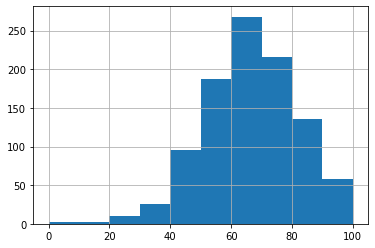

In [14]:
students_performanse.math_score.hist()

In [15]:
students_performanse.math_score.mean()

66.089

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

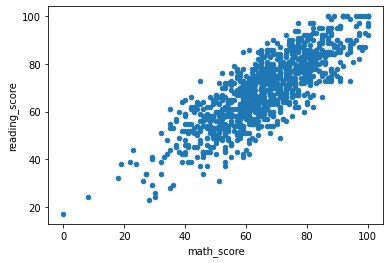

In [16]:
students_performanse.plot.scatter(x='math_score', y='reading_score')

___
Построение более красивых графиков лучше осуществлять с помощью библиотеки seaborn

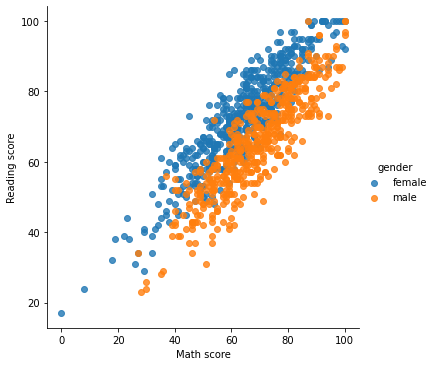

In [25]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender' ,data=students_performanse,
          fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

___
Решение задачи 1.7.5

Представьте, что у вас есть датафрэйм df, хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

Убедитесь, что вы используте версию seaborn > = 0.9.

___

In [27]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

In [30]:
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<AxesSubplot:>

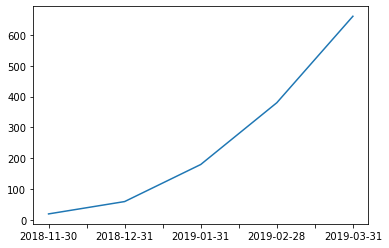

In [32]:
df['income'].plot()

<AxesSubplot:ylabel='income'>

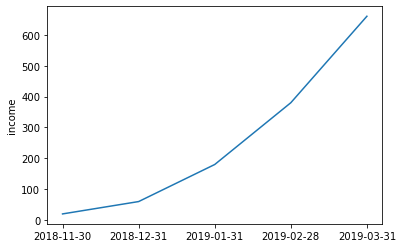

In [33]:
sns.lineplot(x=df.index, y=df.income)

<AxesSubplot:>

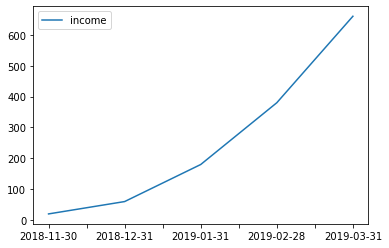

In [34]:
df.plot(kind='line')

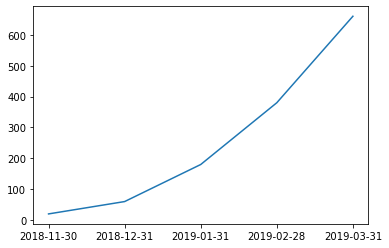

In [35]:
plt.plot(df.index, df.income)

<AxesSubplot:>

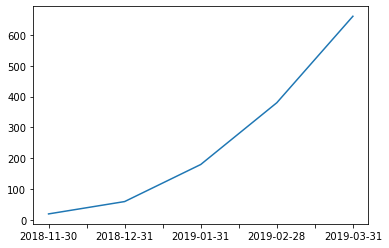

In [36]:
df.income.plot()

<AxesSubplot:>

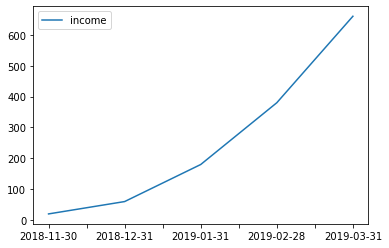

In [37]:
df.plot()

<AxesSubplot:>

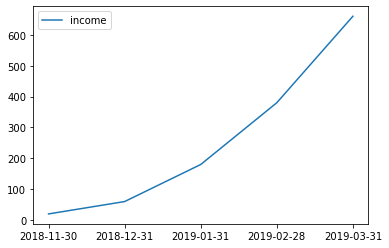

In [38]:
sns.lineplot(data=df)

___
Задача 1.7.6

Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

В ответе вы должны указать число кластеров в виде числа (например: 3).
___

In [47]:
df = pd.read_csv('dataset_209770_6_1.txt', sep=' ')

In [48]:
df.head()

,x,y
0,784.648374,807.144387
1,1196.044303,1083.665468
2,203.469123,603.401777
3,795.094697,789.616430
4,1222.646984,1101.985345


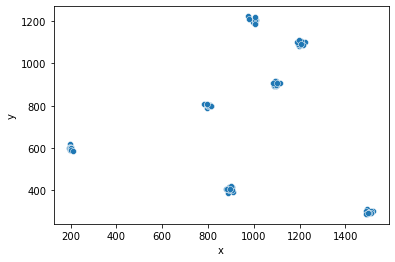

In [50]:
ax = sns.scatterplot(x='x', y='y',data=df)

___
Задача 1.7.7

Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

Чтобы график отображался как на картинках, добавьте
___

In [53]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)

In [54]:
df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


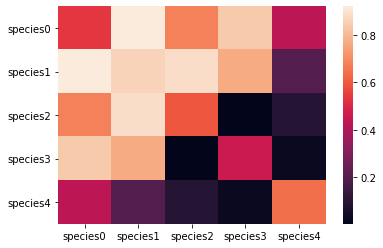

In [58]:
g = sns.heatmap(df)# ваш код для создания теплокарты, укажите параметр cmap="viridis" для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

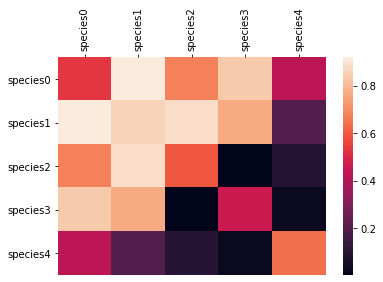

In [63]:
g = sns.heatmap(df)# ваш код для создания теплокарты, укажите параметр cmap="viridis" для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

___
Пришло время узнать, какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для этого не нужно.

Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по dota 2
___

In [64]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col=0)

In [65]:
df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [83]:
df = df.assign(num_of_roles = (df.roles.str.count(',')+1))

In [84]:
df.head()


,attack_type,id,legs,localized_name,name,primary_attr,roles,num_of_roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


<AxesSubplot:>

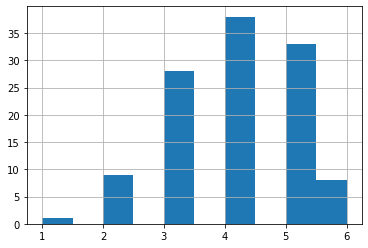

In [85]:
df.num_of_roles.hist()

In [93]:
df.groupby('num_of_roles').count()

,attack_type,id,legs,localized_name,name,primary_attr,roles
num_of_roles,,,,,,,
1,1,1,1,1,1,1,1
2,9,9,9,9,9,9,9
3,28,28,28,28,28,28,28
4,38,38,38,38,38,38,38
5,33,33,33,33,33,33,33
6,8,8,8,8,8,8,8
